# Modelo de clasificación

### Pasos previos

####  Importamos librerías

In [78]:
pip install shap

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [79]:
!pip install xgboost


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [80]:
!pip install lightgbm


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [133]:
# Datos
import numpy as np
import pandas as pd

# Visualizacion
import matplotlib.pyplot as plt
import seaborn as sns
from random import random

# Preprocessing
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import VarianceThreshold
from scipy import stats

# Evaluacion
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics

# Inhabilita warnings
import warnings
warnings.filterwarnings("ignore")

# Tamaño default de los plots
plt.rcParams["figure.figsize"] = [10,6]

# Para guardar/descargar archivos comprimidos
import pickle

# Para visualizar mas columnas en un df
pd.set_option('display.max_columns',None)

# Importamos evaluación - al ser clasificacion AUC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

# ALGORITMO LINEAL
from sklearn.linear_model import LogisticRegression
# ALGORITMO DE REGLAS
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
# ALGORITMO DE DISTANCIA
from sklearn.neighbors import KNeighborsClassifier
# ALGORITMO DE PROBABILIDAD
from sklearn.naive_bayes import GaussianNB

#Cálculo del error cuadrático medio
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

#Evaluación del rendimiento del modelo de clasificación
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Medición del rendimiento del modelo de clasificación
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


#Shap value - valor de salida
import shap

#Pruebas de predict
from sklearn.preprocessing import StandardScaler
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split

import pandas as pd
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

#Feature Importance
import lightgbm as lgb
import pandas as pd
from sklearn.model_selection import train_test_split

import os

#### Cargamos dataset

In [82]:
CWD = os.getcwd()
DATA_PATH = r'C:\Users\andre\OneDrive\Documentos\BOOTCAMP\Capstone Project\capstone2030\df_modelo.xlsx'
ruta_data = os.path.join(CWD, DATA_PATH)

In [83]:
df = pd.read_excel(ruta_data)


df.sample(5)

,FTE,DWL,EPEHHASWA,ATTAOTDWH,CPI,MME,MENI,ARP,S20/S80IQ,GTE,PFNFEAT,TSEFEHWA,PCAEPTCGEOPD,PDCAHE,WDSCLOTHAODOSTW,WIVORCAAOM,SOM,SOMP,SOMRA,SOMBILQCSBOD,SOBMCB,SOBMRFO,SOBMPBO,SMDMBNO,SPHGVO,LEIAVAB,HLYIAAB,PWDSANII,PDPAACFV,PWUNFME,PWUNFDE,Sexo,Index_year,ID_Country,GEI
237,52,34,5,29,61,1676,11196,18,20,19,10,14,21,12,19,10,81,81,73,73,75,71,40,91,63,75,57,57,28,4,3,0,2020,HR,57.915688
317,39,33,24,33,56,1961,18664,20,17,31,17,49,40,84,39,6,47,42,47,31,50,50,100,24,73,87,70,76,36,0,6,1,2021,ES,73.663651
319,47,38,39,27,65,2419,22728,13,27,40,36,51,36,86,60,15,56,46,45,34,25,38,43,28,68,85,55,70,60,7,7,1,2021,FI,75.328453
389,58,41,42,35,67,2628,21408,17,25,44,39,53,29,74,51,27,52,46,48,37,29,53,54,55,73,84,73,80,60,4,3,1,2022,SE,83.946452
156,30,26,25,19,52,2134,17284,20,18,14,13,44,34,81,24,13,27,30,18,28,22,70,25,8,63,85,63,80,24,9,12,1,2017,IT,62.121375


### Preprocesamiento

#### Primera visualización


In [84]:
df.head()

,FTE,DWL,EPEHHASWA,ATTAOTDWH,CPI,MME,MENI,ARP,S20/S80IQ,GTE,PFNFEAT,TSEFEHWA,PCAEPTCGEOPD,PDCAHE,WDSCLOTHAODOSTW,WIVORCAAOM,SOM,SOMP,SOMRA,SOMBILQCSBOD,SOBMCB,SOBMRFO,SOBMPBO,SMDMBNO,SPHGVO,LEIAVAB,HLYIAAB,PWDSANII,PDPAACFV,PWUNFME,PWUNFDE,Sexo,Index_year,ID_Country,GEI
0,62,39,8,36,65,2574,23107,12,23,18,18,22,15,11,25,32,61,71,69,91,100,70,80,86,72,78,59,53,55,3,6,0,2013,AT,58.669621
1,54,35,11,33,66,2835,19734,13,25,27,15,30,34,36,39,15,77,61,60,90,78,60,73,88,75,78,64,50,36,1,3,0,2013,BE,69.255331
2,51,33,4,31,62,827,7027,18,19,15,9,14,18,11,19,6,68,78,75,89,86,56,40,80,72,70,63,47,18,14,15,0,2013,BG,55.038562
3,65,41,6,18,51,2503,21851,14,22,27,15,15,25,17,22,10,83,88,80,96,100,75,89,96,77,79,65,54,39,6,14,0,2013,CY,48.986893
4,63,37,5,11,65,1438,11357,7,30,15,17,18,25,12,28,7,89,81,82,88,86,70,83,93,65,75,62,54,37,4,5,0,2013,CZ,55.569285


In [85]:
df.shape

(392, 35)

In [86]:
df.describe()

,FTE,DWL,EPEHHASWA,ATTAOTDWH,CPI,MME,MENI,ARP,S20/S80IQ,GTE,PFNFEAT,TSEFEHWA,PCAEPTCGEOPD,PDCAHE,WDSCLOTHAODOSTW,WIVORCAAOM,SOM,SOMP,SOMRA,SOMBILQCSBOD,SOBMCB,SOBMRFO,SOBMPBO,SMDMBNO,SPHGVO,LEIAVAB,HLYIAAB,PWDSANII,PDPAACFV,PWUNFME,PWUNFDE,Sexo,Index_year,GEI
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.00000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,50.359694,35.359694,18.012755,26.250000,62.857143,2072.214286,17278.40051,20.869898,25.665816,25.053571,17.099490,31.535714,31.969388,54.750000,29.071429,12.252551,50.010204,50.025510,50.000000,50.076531,50.007653,50.007653,50.020408,50.000000,66.772959,79.780612,61.933673,62.451531,37.571429,5.206633,5.750000,0.500000,2018.142857,63.312071
std,9.116787,3.875387,11.727396,10.936167,5.110543,731.696749,6556.50708,17.881420,15.203582,7.616424,7.105547,12.656539,8.333158,25.038461,14.414400,6.784215,25.030823,24.407231,24.101979,30.951480,33.075245,21.371933,23.612918,35.749984,10.054683,4.220015,4.877600,11.956130,13.310189,4.261366,4.140592,0.500639,3.047787,8.698087
min,29.000000,22.000000,3.000000,11.000000,51.000000,633.000000,4196.00000,7.000000,12.000000,10.000000,8.000000,12.000000,12.000000,9.000000,6.000000,2.000000,0.000000,9.000000,9.000000,2.000000,0.000000,0.000000,0.000000,2.000000,38.000000,68.000000,51.000000,35.000000,6.000000,0.000000,0.000000,0.000000,2013.000000,48.614853
25%,43.000000,33.000000,7.000000,18.000000,60.750000,1463.000000,11479.00000,13.000000,18.000000,19.000000,13.000000,19.000000,25.000000,32.000000,18.000000,7.000000,28.000000,27.000000,26.000000,20.000000,20.000000,37.000000,32.750000,13.000000,62.000000,78.000000,58.000000,53.000000,29.000000,2.000000,3.000000,0.000000,2015.000000,55.781477
50%,50.000000,36.000000,14.000000,24.000000,64.000000,2021.000000,17788.50000,16.000000,22.000000,25.000000,15.000000,30.000000,31.000000,57.000000,25.000000,11.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,69.000000,80.000000,62.000000,63.000000,36.000000,4.000000,5.000000,0.500000,2019.000000,62.154167
75%,58.000000,38.000000,27.000000,33.000000,66.000000,2657.000000,22331.25000,20.000000,26.000000,30.000000,19.000000,41.250000,38.000000,79.250000,39.250000,16.000000,72.250000,73.000000,74.000000,80.000000,80.000000,63.000000,67.250000,87.000000,73.000000,83.000000,65.000000,72.000000,47.000000,7.000000,7.000000,1.000000,2021.000000,70.153497
max,67.000000,43.000000,44.000000,56.000000,73.000000,3625.000000,39265.00000,90.000000,84.000000,45.000000,46.000000,58.000000,50.000000,89.000000,60.000000,38.000000,100.000000,91.000000,91.000000,98.000000,100.000000,100.000000,100.000000,98.000000,84.000000,87.000000,75.000000,85.000000,75.000000,22.000000,22.000000,1.000000,2022.000000,83.946452


#### Data cleaning

In [87]:
#Colocamos una columna como índice
df.set_index('ID_Country', inplace=True)

In [88]:
df.head(20)

,FTE,DWL,EPEHHASWA,ATTAOTDWH,CPI,MME,MENI,ARP,S20/S80IQ,GTE,PFNFEAT,TSEFEHWA,PCAEPTCGEOPD,PDCAHE,WDSCLOTHAODOSTW,WIVORCAAOM,SOM,SOMP,SOMRA,SOMBILQCSBOD,SOBMCB,SOBMRFO,SOBMPBO,SMDMBNO,SPHGVO,LEIAVAB,HLYIAAB,PWDSANII,PDPAACFV,PWUNFME,PWUNFDE,Sexo,Index_year,GEI
ID_Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AT,62,39,8,36,65,2574,23107,12,23,18,18,22,15,11,25,32,61,71,69,91,100,70,80,86,72,78,59,53,55,3,6,0,2013,58.669621
BE,54,35,11,33,66,2835,19734,13,25,27,15,30,34,36,39,15,77,61,60,90,78,60,73,88,75,78,64,50,36,1,3,0,2013,69.255331
BG,51,33,4,31,62,827,7027,18,19,15,9,14,18,11,19,6,68,78,75,89,86,56,40,80,72,70,63,47,18,14,15,0,2013,55.038562
CY,65,41,6,18,51,2503,21851,14,22,27,15,15,25,17,22,10,83,88,80,96,100,75,89,96,77,79,65,54,39,6,14,0,2013,48.986893
CZ,63,37,5,11,65,1438,11357,7,30,15,17,18,25,12,28,7,89,81,82,88,86,70,83,93,65,75,62,54,37,4,5,0,2013,55.569285
DE,58,39,9,18,68,3062,20995,14,22,26,15,22,27,33,25,23,72,69,68,87,100,63,76,84,66,78,58,47,53,6,4,0,2013,62.605909
DK,58,41,13,50,73,3307,19324,14,21,24,33,29,18,45,51,24,53,62,66,82,71,63,71,83,73,77,62,44,59,4,5,0,2013,75.224597
EE,53,36,5,16,65,1424,9025,15,19,22,18,13,35,38,38,14,92,77,71,93,82,100,88,90,56,71,54,43,36,5,7,0,2013,53.367682
GR,57,37,7,16,52,2134,15168,19,18,18,11,17,12,9,18,5,77,83,79,94,92,89,83,92,78,78,66,54,25,6,7,0,2013,48.614853


In [89]:
#Ordenamos el índice - no hace falta ordenar nada.
#df.sort_index(inplace=True)

In [90]:
#Corregimos formatos - no hace falta corregir nada.
#df['...'] = df['...'].astype('type')

In [91]:
#Checkeamos los duplicados
df.duplicated().sum()

0

In [92]:
#Checkeamos las filas sin target
df['Sexo'].isna().sum()

0

In [93]:
#Eliminamos filas sin TARGET informado - no lo ejecutamos porque no hay alguna.
#df.dropna(axis=0, subset=['...'], inplace=True)

#### EDA

In [94]:
#Indicamos variables y target
target = 'Sexo'
features = df.columns[df.columns!=target]

#Definimos el target como booleano
df[target] = df[target].astype('bool')

#Dividimos el dataset en matriz de variables (X) y output (y)
X = df[features]
y = df[target]

In [95]:
X_train = df.drop("Sexo", axis=1)
y_train = df["Sexo"]

In [96]:
#Estudiamos la distribucion de las variables
#for i in features:
#  sns.distplot(X[i])
#  plt.title('Distribucion '+i)
#  plt.show()

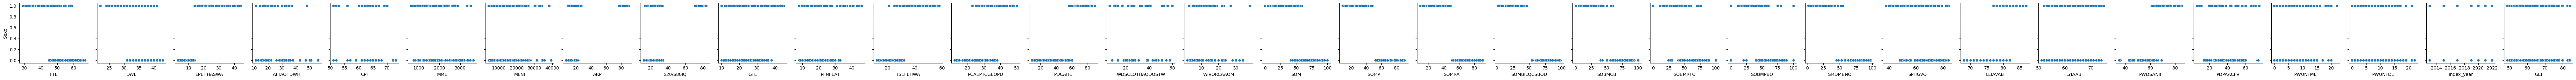

In [97]:
#Estudiamos la dispersión target-variable
sns.pairplot(df,x_vars=features, y_vars=target)
plt.show()

#### Preprocesamiento

Nulos

In [98]:
#Vemos los nulos por variable/columna
df.isna().sum()

FTE                0
DWL                0
EPEHHASWA          0
ATTAOTDWH          0
CPI                0
MME                0
MENI               0
ARP                0
S20/S80IQ          0
GTE                0
PFNFEAT            0
TSEFEHWA           0
PCAEPTCGEOPD       0
PDCAHE             0
WDSCLOTHAODOSTW    0
WIVORCAAOM         0
SOM                0
SOMP               0
SOMRA              0
SOMBILQCSBOD       0
SOBMCB             0
SOBMRFO            0
SOBMPBO            0
SMDMBNO            0
SPHGVO             0
LEIAVAB            0
HLYIAAB            0
PWDSANII           0
PDPAACFV           0
PWUNFME            0
PWUNFDE            0
Sexo               0
Index_year         0
GEI                0
dtype: int64

In [99]:
#Imputamos nulos - no necesito hacerlo

Correlación

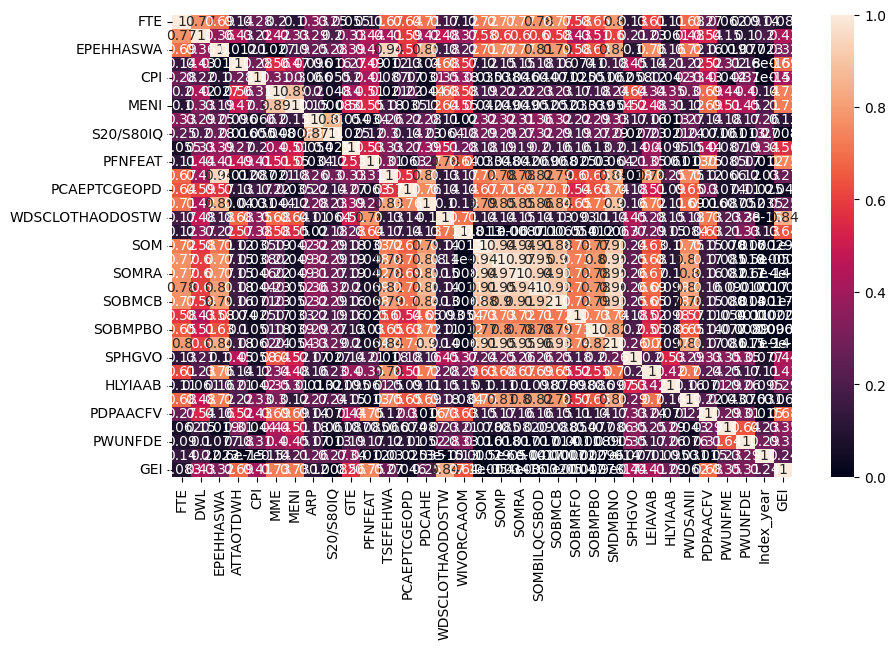

In [100]:
#Mostramos tabla correlación
sns.heatmap(X.corr().abs(),annot=True)
plt.show()

In [101]:
#Vemos la función correlación
def highly_correlated(X, y, threshold):
    col_corr = list() # Set of all the names of deleted columns
    colnames = list()
    rownames = list()
    corr_matrix = X.corr().abs()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colnames.append(corr_matrix.columns[i]) # getting the name of column
                rownames.append(corr_matrix.index[j])
                col_corr.append(corr_matrix.iloc[i, j])
    Z = pd.DataFrame({'F1':colnames,
                      'F2':rownames,
                      'corr_F1_F2':col_corr,
                      'corr_F1_target': [np.abs(np.corrcoef(X[i],y)[0,1]) for i in colnames],
                      'corr_F2_target': [np.abs(np.corrcoef(X[i],y)[0,1]) for i in rownames]
                      })
    Z['F_to_delete'] = rownames
    Z['F_to_delete'][Z['corr_F1_target'] < Z['corr_F2_target']] = Z['F1'][Z['corr_F1_target'] < Z['corr_F2_target']]

    return Z

highly_corr = highly_correlated(X,y,0.95)
highly_corr

,F1,F2,corr_F1_F2,corr_F1_target,corr_F2_target,F_to_delete
0,SOMRA,SOMP,0.965312,0.908232,0.912989,SOMRA
1,SOMBILQCSBOD,SOMP,0.954567,0.941779,0.912989,SOMP
2,SMDMBNO,SOMP,0.950180,0.965840,0.912989,SOMP
3,SMDMBNO,SOMBILQCSBOD,0.958430,0.965840,0.941779,SOMBILQCSBOD


In [102]:
#Eliminamos las features altamente correlacionadas
drop_cols = list(highly_corr['F_to_delete'])
X.drop(columns=drop_cols, inplace=True)
print('Eliminadas columnas altamente correlacionadas:', drop_cols)

Eliminadas columnas altamente correlacionadas: ['SOMRA', 'SOMP', 'SOMP', 'SOMBILQCSBOD']


Varianza

In [103]:
#Eliminamos columnas practicamente constantes (nula varianza)
vt = VarianceThreshold(threshold = 0.01)
vt.fit(X)

cols_lowvar = X.columns[vt.get_support()==False]
X.drop(columns=cols_lowvar,inplace=True)

print(len(cols_lowvar),' low variance features were removed:\n', cols_lowvar.to_list())

0  low variance features were removed:
 []


### Modelo

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, AT to SK
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   FTE              392 non-null    int64  
 1   DWL              392 non-null    int64  
 2   EPEHHASWA        392 non-null    int64  
 3   ATTAOTDWH        392 non-null    int64  
 4   CPI              392 non-null    int64  
 5   MME              392 non-null    int64  
 6   MENI             392 non-null    int64  
 7   ARP              392 non-null    int64  
 8   S20/S80IQ        392 non-null    int64  
 9   GTE              392 non-null    int64  
 10  PFNFEAT          392 non-null    int64  
 11  TSEFEHWA         392 non-null    int64  
 12  PCAEPTCGEOPD     392 non-null    int64  
 13  PDCAHE           392 non-null    int64  
 14  WDSCLOTHAODOSTW  392 non-null    int64  
 15  WIVORCAAOM       392 non-null    int64  
 16  SOM              392 non-null    int64  
 17  SOMP             392 

In [105]:
df['Index_year'].value_counts()

Index_year
2013    56
2015    56
2017    56
2019    56
2020    56
2021    56
2022    56
Name: count, dtype: int64

#### Separar train y test

In [106]:
#Dividimos X-y en Train (85%) y Test (15%) - HOLDOUT - 14285714
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.14285714, shuffle = False, random_state = 42)
print('Train set size:',X_train.shape[0])
print('Test set size:',X_test.shape[0])

Train set size: 336
Test set size: 56


In [107]:
X_test

,FTE,DWL,EPEHHASWA,ATTAOTDWH,CPI,MME,MENI,ARP,S20/S80IQ,GTE,PFNFEAT,TSEFEHWA,PCAEPTCGEOPD,PDCAHE,WDSCLOTHAODOSTW,WIVORCAAOM,SOM,SOBMCB,SOBMRFO,SOBMPBO,SMDMBNO,SPHGVO,LEIAVAB,HLYIAAB,PWDSANII,PDPAACFV,PWUNFME,PWUNFDE,Index_year,GEI
ID_Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AT,60,40,9,36,65,3018,27206,12,24,30,16,22,21,28,25,15,47,100,57,60,84,75,79,58,56,48,0,1,2022,68.802012
BE,53,35,12,33,66,3075,25032,13,27,30,14,29,29,33,39,10,50,65,62,70,79,78,79,64,51,41,2,5,2022,74.196806
BG,57,35,4,31,62,1256,11604,21,12,20,8,21,26,13,19,2,64,57,50,60,76,71,70,64,47,20,2,3,2022,60.695323
CY,62,41,6,18,51,2303,21970,13,23,33,11,18,34,27,22,8,75,88,78,78,90,79,80,63,60,31,0,4,2022,57.279331
CZ,66,39,5,11,65,1845,16507,7,31,19,14,21,20,16,28,11,83,100,70,85,92,65,75,61,50,33,2,2,2022,57.239282
DE,60,41,9,18,68,3461,26504,18,15,30,14,17,19,29,25,13,50,67,55,66,78,65,79,65,44,55,1,1,2022,68.664431
DK,57,42,13,50,73,3479,24929,12,24,28,24,25,21,55,51,20,70,64,52,55,73,73,80,58,43,60,9,8,2022,77.832795
EE,64,40,5,16,65,1896,16298,20,19,28,18,17,31,47,38,11,60,91,83,89,86,61,74,56,55,35,14,3,2022,61.025263
GR,50,36,9,16,52,1802,11994,17,19,24,12,16,20,16,18,6,84,83,89,83,89,80,79,65,59,32,11,10,2022,53.415973


In [108]:
#Mostramos los valores objetivo
print('Train data instances:', len(y_train))
print('Test data instances:', len(y_test))

Train data instances: 336
Test data instances: 56


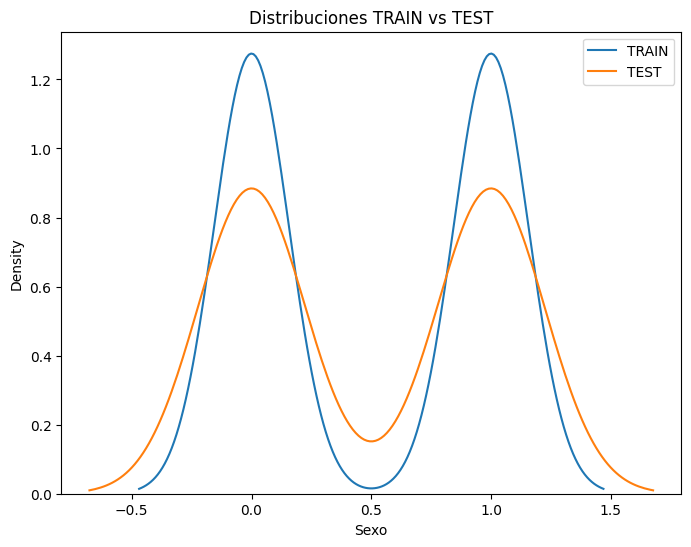

In [109]:
#Distribución target train y test
plt.figure(figsize=[8,6])
sns.kdeplot(y_train,label='TRAIN')
sns.kdeplot(y_test,label='TEST')
plt.title('Distribuciones TRAIN vs TEST')
plt.legend()
plt.show()

#### Rescaling

In [110]:
#Realizamos la estandarización: fit_transform() en train, transform() en test
scaler = StandardScaler()

#Vemos la matriz de numpy
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

#Lo pasamos a dataframe
X_train_std = pd.DataFrame(X_train_std, columns = X_train.columns, index= X_train.index)
X_test_std = pd.DataFrame(X_test_std, columns = X_test.columns, index= X_test.index)

## Torneo de modelos

K-Fold Cross validation

In [111]:
def auc(model,X,y):
  model.fit(X,y)
  return roc_auc_score(y,model.predict_proba(X)[:,1])

def auc_cross_validation(model, X, y):
  cross_val = cross_val_score(model,
                              X, y,
                              cv=2,
                              scoring='roc_auc'
                              )

  return cross_val.mean()

In [112]:
#Inicializamos los resultados
label_ = []
auc_train_ = []
auc_valida_ = []

#Creamos la funcion que devuelve un dataframe con resultados de RMSE Cross Validation
def evaluate_classification(model, X, y, label=None):
  if label is None:
    label = str(model)
  label_.append(label)

  auc_train = auc(model, X, y)
  auc_valida = auc_cross_validation(model, X, y)
  auc_train_.append(auc_train)
  auc_valida_.append(auc_valida)



  return pd.DataFrame({'Model': label_,
                      'AUC Train': auc_train_,
                      'AUC Cross-Valida': auc_valida_
                      }).sort_values('AUC Cross-Valida', ascending= False)

#### Modelos de regresión - Algoritmos

In [113]:
#Probamos cada uno de los modelos en la función definida

In [114]:
#LogisticRegression
evaluate_classification(model = LogisticRegression(),
                    X=X_train_std, y=y_train)

,Model,AUC Train,AUC Cross-Valida
0,LogisticRegression(),1.0,1.0


In [115]:
#RandomForestClassifier max_depth 3
evaluate_classification(model = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=3),
                    X=X_train, y=y_train)

,Model,AUC Train,AUC Cross-Valida
0,LogisticRegression(),1.0,1.0
1,"RandomForestClassifier(criterion='entropy', ma...",1.0,1.0


In [116]:
#RandomForestClassifier max_depth 5
evaluate_classification(model = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=5),
                    X=X_train, y=y_train)

,Model,AUC Train,AUC Cross-Valida
0,LogisticRegression(),1.0,1.0
1,"RandomForestClassifier(criterion='entropy', ma...",1.0,1.0
2,"RandomForestClassifier(criterion='entropy', ma...",1.0,1.0


In [117]:
#AdaBoostClassifier
evaluate_classification(model = AdaBoostClassifier(),
                    X=X_train, y=y_train)

,Model,AUC Train,AUC Cross-Valida
0,LogisticRegression(),1.0,1.000000
1,"RandomForestClassifier(criterion='entropy', ma...",1.0,1.000000
2,"RandomForestClassifier(criterion='entropy', ma...",1.0,1.000000
3,AdaBoostClassifier(),1.0,0.967262


In [118]:
#XGBClassifier
evaluate_classification(model = XGBClassifier(objective ='binary:logistic'),
                    X=X_train, y=y_train)

,Model,AUC Train,AUC Cross-Valida
0,LogisticRegression(),1.0,1.000000
1,"RandomForestClassifier(criterion='entropy', ma...",1.0,1.000000
2,"RandomForestClassifier(criterion='entropy', ma...",1.0,1.000000
3,AdaBoostClassifier(),1.0,0.967262
4,"XGBClassifier(base_score=None, booster=None, c...",1.0,0.967262


In [119]:
#LGBMClassifier
evaluate_classification(model = LGBMClassifier(),
                    X=X_train, y=y_train)

[LightGBM] [Info] Number of positive: 168, number of negative: 168
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000135 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1199
[LightGBM] [Info] Number of data points in the train set: 336, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

,Model,AUC Train,AUC Cross-Valida
0,LogisticRegression(),1.0,1.000000
1,"RandomForestClassifier(criterion='entropy', ma...",1.0,1.000000
2,"RandomForestClassifier(criterion='entropy', ma...",1.0,1.000000
5,LGBMClassifier(),1.0,0.990469
3,AdaBoostClassifier(),1.0,0.967262
4,"XGBClassifier(base_score=None, booster=None, c...",1.0,0.967262


In [120]:
#DecissionTreeClassifier
evaluate_classification(model = DecisionTreeClassifier(criterion='entropy', max_depth = 3),
                    X=X_train, y=y_train)

,Model,AUC Train,AUC Cross-Valida
0,LogisticRegression(),1.0,1.000000
1,"RandomForestClassifier(criterion='entropy', ma...",1.0,1.000000
2,"RandomForestClassifier(criterion='entropy', ma...",1.0,1.000000
6,"DecisionTreeClassifier(criterion='entropy', ma...",1.0,0.991071
5,LGBMClassifier(),1.0,0.990469
3,AdaBoostClassifier(),1.0,0.967262
4,"XGBClassifier(base_score=None, booster=None, c...",1.0,0.967262


In [121]:
#KNeighborsClassifier
evaluate_classification(model = KNeighborsClassifier(n_neighbors = 10),
                    X=X_train_std, y=y_train)

,Model,AUC Train,AUC Cross-Valida
0,LogisticRegression(),1.0,1.000000
1,"RandomForestClassifier(criterion='entropy', ma...",1.0,1.000000
2,"RandomForestClassifier(criterion='entropy', ma...",1.0,1.000000
7,KNeighborsClassifier(n_neighbors=10),1.0,1.000000
6,"DecisionTreeClassifier(criterion='entropy', ma...",1.0,0.991071
5,LGBMClassifier(),1.0,0.990469
3,AdaBoostClassifier(),1.0,0.967262
4,"XGBClassifier(base_score=None, booster=None, c...",1.0,0.967262


In [122]:
#Naive - Bayes
evaluate_classification(model = GaussianNB(),
                    X=X_train_std, y=y_train)

,Model,AUC Train,AUC Cross-Valida
0,LogisticRegression(),1.0,1.000000
1,"RandomForestClassifier(criterion='entropy', ma...",1.0,1.000000
2,"RandomForestClassifier(criterion='entropy', ma...",1.0,1.000000
7,KNeighborsClassifier(n_neighbors=10),1.0,1.000000
8,GaussianNB(),1.0,1.000000
6,"DecisionTreeClassifier(criterion='entropy', ma...",1.0,0.991071
5,LGBMClassifier(),1.0,0.990469
3,AdaBoostClassifier(),1.0,0.967262
4,"XGBClassifier(base_score=None, booster=None, c...",1.0,0.967262


## Test

In [123]:
LGBMClassifier()

LGBMClassifier()

### MODELO 3 (ELEGID0) - LGBMClassifier()

In [124]:
LGBMClassifier()

LGBMClassifier()

In [125]:
model_lgbm = lgb.LGBMClassifier()
model_lgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 168, number of negative: 168
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000138 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1199
[LightGBM] [Info] Number of data points in the train set: 336, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

LGBMClassifier()

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [127]:
model_lgbm = LGBMClassifier()
model_lgbm.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 158, number of negative: 155
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000124 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1172
[LightGBM] [Info] Number of data points in the train set: 313, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504792 -> initscore=0.019170
[LightGBM] [Info] Start training from score 0.019170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

LGBMClassifier()

In [128]:
#Predicciones en el conjunto de entrenamiento
y_train_pred_lgbm = model_lgbm.predict(X_train)

#Predicciones en el conjunto de prueba
y_test_pred_lgbm = model_lgbm.predict(X_test)

#Medimos la evaluación del rendimiento

print('Accuracy:', round(accuracy_score(y_test, y_test_pred_lgbm), 4))
print('Precision:', round(precision_score(y_test, y_test_pred_lgbm), 4))
print('Recall:', round(recall_score(y_test, y_test_pred_lgbm), 4))
print('F1-score:', round(f1_score(y_test, y_test_pred_lgbm), 4))


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


[]

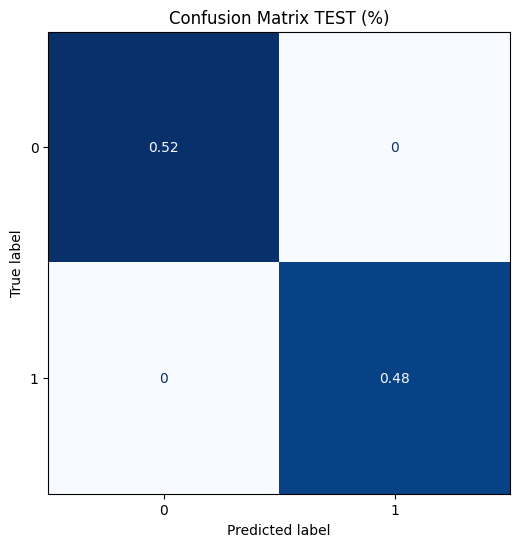

In [129]:
#Vemos la Confusion Matrix
cm_lgbm = confusion_matrix(y_test, y_test_pred_lgbm)
ConfusionMatrixDisplay(confusion_matrix=cm_lgbm / len(y_test)).plot(colorbar=False, cmap='Blues')
plt.title('Confusion Matrix TEST (%)')
plt.plot()


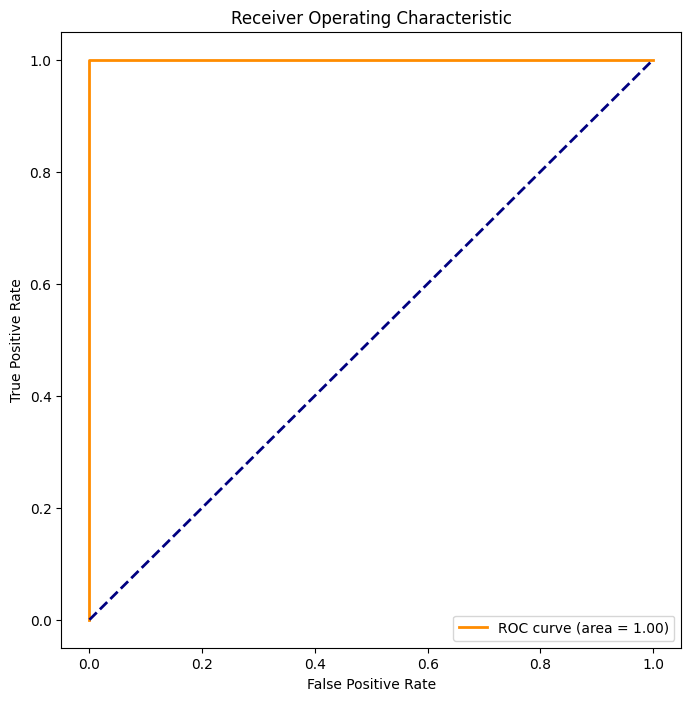

In [134]:
y_test_pred_proba_lgbm = model_lgbm.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba_lgbm)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


#### Interpretability

In [135]:
#Creamos un explainer con el modelo entrenado y los datos de entrenamiento
explainer_lgbm = shap.TreeExplainer(model_lgbm)

#Calculamos los valores SHAP para un conjunto de datos
shap_values_lgbm = explainer_lgbm.shap_values(X_test)

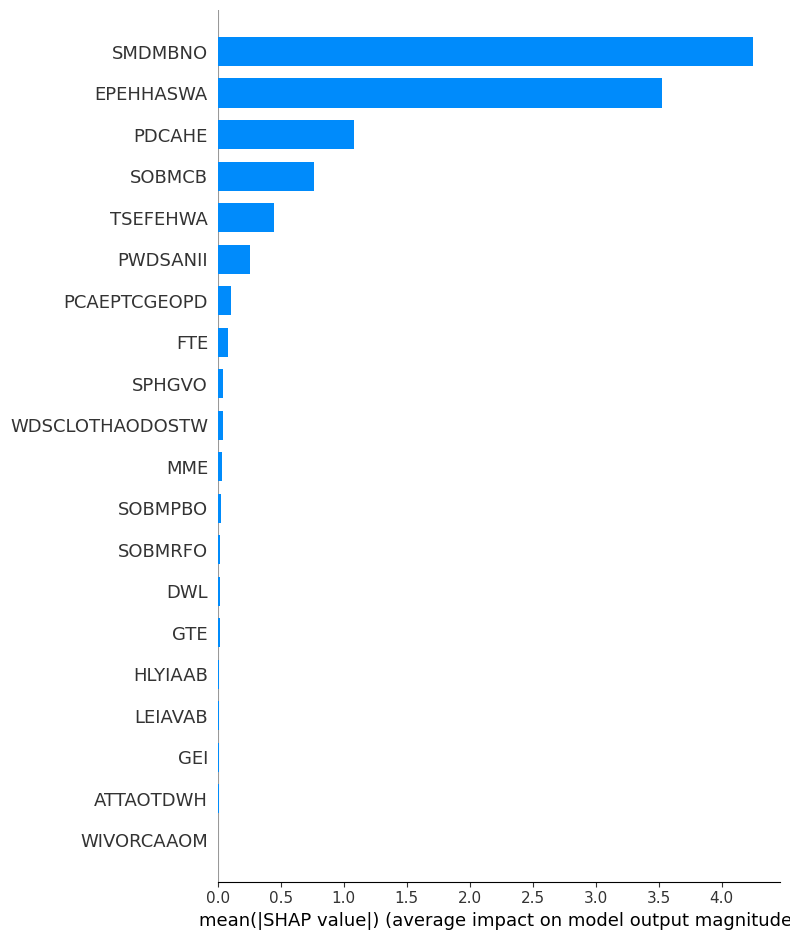

In [136]:
shap.summary_plot(shap_values_lgbm, X_test, plot_type="bar")

Las variables más importantes que afectan a la predicción del modelo son 'EPEHHASWA' (Employed people in Education, Human Health and Social Work activities (%, 15+ employed)), 'SMDMBNO' (Share of members of highest decision making body of the national Olympic sport organisations (% W, M)), 'PDCAHE' (People doing cooking and/or housework, every day (%, 18+ population)), 'SOBMCB' (Share of board members of central bank (% W, M)) y 'TSEFEHWA' (Tertiary students in the fields of Education, Health and Welfare, Humanities and Art (tertiary students) (%, 15+ population)), 'PWDSANII' (People who don’t smoke and are not involved in harmful drinking (%, 16+ population)), 'PCAEPTCGEOPD' (People caring for and educating their children or grandchildren, elderly or people with disabilities, every day (%, 18+ population)), 'FTE' (Full-time equivalent employment rate (%, 15+ population)), 'SPHGVO' (Self-perceived health, good or very good (%, 16+ population)).

## Feature importance

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, AT to SK
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   FTE              392 non-null    int64  
 1   DWL              392 non-null    int64  
 2   EPEHHASWA        392 non-null    int64  
 3   ATTAOTDWH        392 non-null    int64  
 4   CPI              392 non-null    int64  
 5   MME              392 non-null    int64  
 6   MENI             392 non-null    int64  
 7   ARP              392 non-null    int64  
 8   S20/S80IQ        392 non-null    int64  
 9   GTE              392 non-null    int64  
 10  PFNFEAT          392 non-null    int64  
 11  TSEFEHWA         392 non-null    int64  
 12  PCAEPTCGEOPD     392 non-null    int64  
 13  PDCAHE           392 non-null    int64  
 14  WDSCLOTHAODOSTW  392 non-null    int64  
 15  WIVORCAAOM       392 non-null    int64  
 16  SOM              392 non-null    int64  
 17  SOMP             392 

In [138]:
# Calculamos el feature importance
feature_importance = model_lgbm.feature_importances_

# Creamos un DataFrame para visualizar los feature importance junto con los nombres de las características
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# los resultados
print(feature_importance_df)


            Feature  Importance
24         PWDSANII         103
12     PCAEPTCGEOPD          93
18          SOBMRFO          88
0               FTE          83
17           SOBMCB          75
3         ATTAOTDWH          66
29              GEI          63
2         EPEHHASWA          63
15       WIVORCAAOM          57
20          SMDMBNO          55
11         TSEFEHWA          51
23          HLYIAAB          46
22          LEIAVAB          45
6              MENI          44
13           PDCAHE          41
25         PDPAACFV          40
5               MME          40
9               GTE          38
21           SPHGVO          36
10          PFNFEAT          35
14  WDSCLOTHAODOSTW          32
16              SOM          32
4               CPI          26
28       Index_year          24
8         S20/S80IQ          16
1               DWL          13
27          PWUNFDE          12
26          PWUNFME           9
7               ARP           9
19          SOBMPBO           7


## Gráficas para observar la media para cada una de las variables en 2022.

In [139]:
columns_to_stay = ['FTE', 'SOMP', 'DWL', 'EPEHHASWA', 'MME', 'Sexo']
columns_to_drop = [col for col in df.columns if col not in columns_to_stay]
df = df.drop(columns=columns_to_drop)
df

,FTE,DWL,EPEHHASWA,MME,SOMP,Sexo
ID_Country,,,,,,
AT,62,39,8,2574,71,False
BE,54,35,11,2835,61,False
BG,51,33,4,827,78,False
CY,65,41,6,2503,88,False
CZ,63,37,5,1438,81,False
...,...,...,...,...,...,...
PT,47,36,30,1367,40,True
RO,42,30,17,1732,20,True
SE,58,41,42,2628,46,True


In [140]:
# Convertir la columna 'Sexo' de booleanos a enteros
df['Sexo'] = df['Sexo'].astype(int)

In [141]:
# Agrupar por la columna 'Sexo' y calcular la media para cada grupo
df_grouped = df.groupby('Sexo').mean()

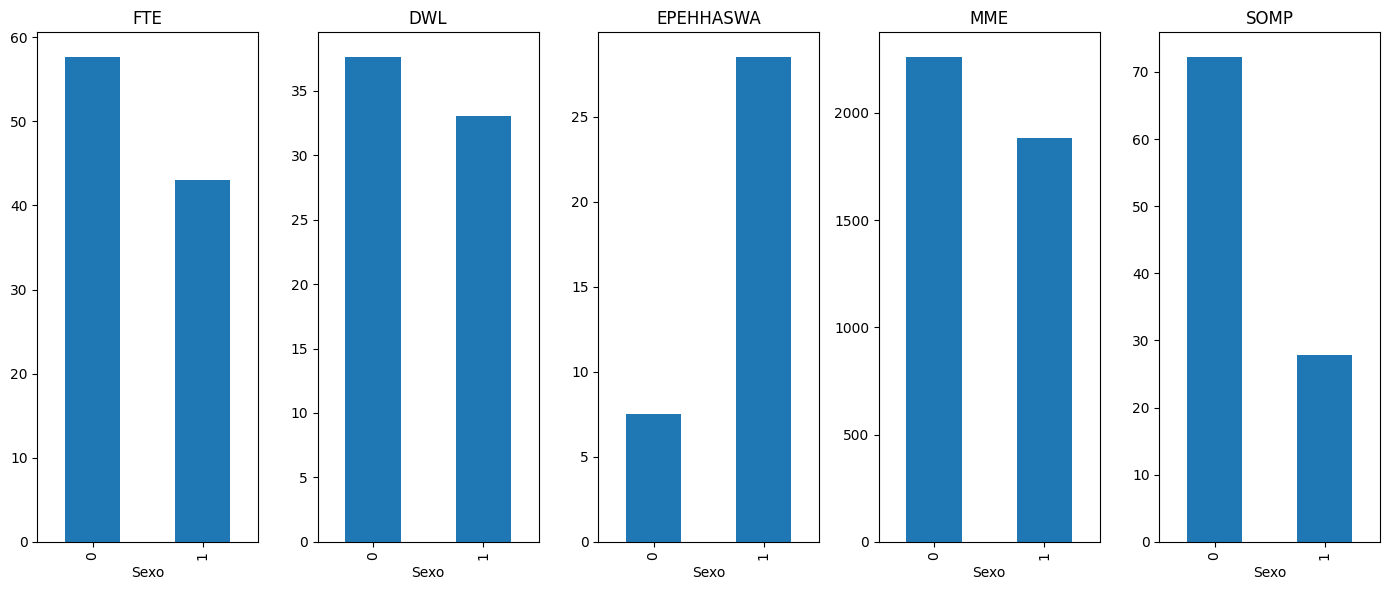

In [142]:
# Creamos una figura y un conjunto de subgráficos
fig, axes = plt.subplots(nrows=1, ncols=df_grouped.shape[1], figsize=(14, 6))

# Títulos para cada subgráfico, asumiendo que df_grouped.columns contiene los nombres de las variables
titles = df_grouped.columns

# Iteramos sobre las columnas y creamos un gráfico de barras para cada una
for i, col in enumerate(df_grouped.columns):
    df_grouped[col].plot(kind='bar', ax=axes[i], title=titles[i])

# Ajustar el layout para que no haya solapamiento de títulos
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Teniendo en cuenta su valor para todos los países. Tal y como ya hemos destacado, se puede observar la gran desigualdad en cuanto al género en estas features.

In [143]:
df_grouped = df_grouped.reset_index()